In [1]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 


로컬에서 작업했음.

사용자명이 한글이여서, os 라이브러리를 이용해서 한글경로를 읽도록 만들고 불러옴

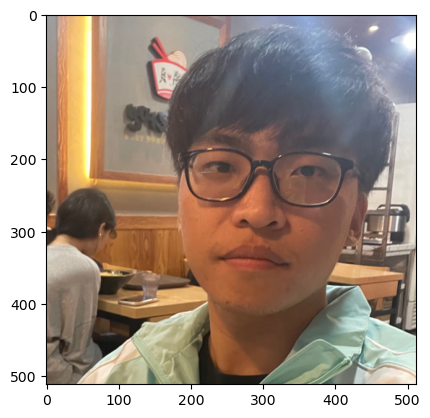

In [2]:
my_image_path = "C:/Users/양자/Desktop/Hun_Works/AIFFEL_quest_rs/Exploration/ex03/images/image.png" # 본인 이미지가 있는 경로를 가지고 온다.

# 한글 경로 지원을 위해 os 모듈 사용
abs_path = os.path.abspath(my_image_path)
img_bgr = cv2.imdecode(np.fromfile(abs_path, dtype=np.uint8), cv2.IMREAD_COLOR)

img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 기본 사진이 잘 업로드 되어있는지 확인하기.

# Hog: Histogram of Oriented Gradients
그래디언트 변화량을 추적하는 메서드를 통해서 형체 감지

즉, 배경에서 갑자기 모양이 변하는 모든 것들을 다 감지하니까 사람 + 배경 내 파티클 모두 감지함

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb,1)

In [4]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t),(r,b), (0,255,0), 2 ,lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

In [5]:
## 원래는 같은 로컬 레포에 모델을 넣어놨는데, 한글명으로 인해 자꾸 오류나서 모델을 외부 폴더에 저장함
## 사용자는 이 패스를 깃허브에 있는 파일을 갖고 동기화 해야할 것
model_path = os.path.abspath("C:/temp files/shape_predictor_68_face_landmarks.dat")
landmark_predictor = dlib.shape_predictor(model_path)

In [6]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
    print(dlib_rect)

[(171, 142) (438, 409)]


In [7]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 인중 인덱스 33 이라고 함
    x = landmark[33][0] # 이미지에서 인중 부위의 x값
    y = landmark[33][1] # 이미지에서 인중 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(293, 302)
(x,y) : (293,302)
(w,h) : (268,268)


In [8]:
cat_path = os.path.abspath("C:/Users/양자/Desktop/Hun_Works/AIFFEL_quest_rs/Exploration/ex03/images/cat-whiskers.png") # 왕관 이미지의 경로
#img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.imdecode(np.fromfile(cat_path, dtype=np.uint8), cv2.IMREAD_COLOR)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(268, 268, 3)


In [9]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값
refined_x = x - w // 2
refined_y = y - h // 2 ## 이렇게 하면 중앙에 오도록 할 수 있다. (top left가 시작점이라는 것을 이용)
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

(x,y) : (159,168)


In [10]:
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (159,168)


In [11]:
# 스티커 영역 추출
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 스티커 이미지의 마스크 생성 (흑색 영역 제외)
mask = (img_sticker < 255)  # True: 흑색이 아닌 부분, False: 흑색 부분

# 마스크 차원 확장 (RGB 채널 처리)
if len(mask.shape) == 2:  # 흑백 이미지인 경우
    mask = np.stack([mask] * 3, axis=-1)  # 채널별로 복제하여 3D 마스크 생성

# 흑색 영역 제외하고 스티커 적용
sticker_area = np.where(mask,  # 마스크 적용
                        cv2.addWeighted(
                            sticker_area.astype(np.float32), 0,  # 원본 이미지 가중치
                            img_sticker.astype(np.float32), 1,  # 스티커 이미지 가중치
                            0
                        ).astype(np.uint8),
                        sticker_area)  # 마스크 False인 경우 원본 유지

# 결과 반영
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

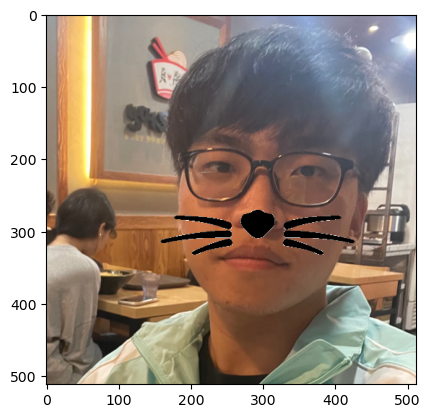

In [12]:
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = sticker_area

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

![테스트1](results/antony.png)  

테스트1. 유명 축구선수의 이미지로 해보았다. 원래 이미지와 다른 해상도의 이미지이지만 문제 없이 작동

![테스트2](results/maguire.png)  
테스트2. 유명 축구선수2. 옆으로 긴 이미지이지만 배경이 애초에 초록색으로 잘 구분되어 있어 문제 없이 작동

![테스트3](results/friend3.png)  
테스트3. 대망의 친구 엽사. 눈도 감겨 있고, 사진 크기도 다소 작으며 세로로 길쭉하지만 그래도 문제 없이 작동함

### 반성
1. 다른 각도에서의 사진으로도 테스트 해야할 것. 죄다 정면샷임
2. 테스트한 모든 사진들이 다 잘 촬영된 느낌인데, 멀리서 촬영돼서 배경에 비해 얼굴 크기가 매우 작은경우 Hog algorithm에 의해서 68개의 랜드마크를 찾는 작업이 힘들 것으로 예상된다.
3. 실행 속도는 그렇게 빠르지도, 느리지도 않은 편이긴 하나, 실제 구현의 경우에는 뭐 여러 코스트가 추가로 들 수도 있을듯? 이 분야는 실무경험이 없어 모르겠음  
4. 정확도라고 하면, 이제 고양이수염의 경우 인중 정도의 위치에 얼굴 사이즈에 비례하여 잘 들어갔는가가 중요한 포인트일텐데 아무래도 Hog algorithm이 68개의 랜드마크를 얼마나 정확히 탐색할 수 있느냐가 중요할듯.